In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Gauss-Jordan Matrix Inversion

In [3]:
def gauss_jordan(mat_in):
    '''
    Do Gauss-Jordan Matrix Inversion.
    A: n x n matrix in a list (rows) of list (columns), e.g., [[1, 2], [4, 5]] is a 2x2 matrix w/ rows [1, 2] and [4,5].
    Return: Aaug, Ainv
        Aaug is the final augmented matrix
        if the front part of Aaug appears to be identity
        Ainv is a valid matrix inversion of A.
    '''
    # Get dimension
    n = len(mat_in)

    # Copy list
    A = []
    for i in range(n):
        A.append(mat_in[i].copy())

    # Make identity
    Imat = [[1 * (i == j) for j in range(n)] for i in range(n)]

    # Augment A with I
    for i in range(n):
        A[i].extend(Imat[i])

    # Get the front part to identity
    for i in range(n):

        # Work on the anchor row: make a diagonal 1
        anchor = A[i][i]
        for j in range(i, 2 * n):
            A[i][j] /= anchor

        # Work on all other rows: make other 0
        for k in range(n):
            if k != i:
                target = A[k][i]
                for j in range(2 * n):
                    if target != 0:
                        A[k][j] = A[k][j] - A[i][j] * target

                # print('Debug2: {}{}: A[{}{}] = {} '.format(i, j,  i,j, A[i][j]))

    Ainv = []
    for i in range(n):
        Ainv.append(A[i][n:])

    return A, Ainv


In [5]:
M0 = [[4, 2, 8], [3, 0, 9], [7, 5, 6]]
print('Before')
print(M0)

M1, M2 = gauss_jordan(M0)

print('After M1')
print(M1)

print('After M2')
print(np.array(M2))


Before
[[4, 2, 8], [3, 0, 9], [7, 5, 6]]
After M1
[[1.0, 0.0, 0.0, -1.5, 0.9333333333333333, 0.6000000000000001], [0.0, 1.0, 0.0, 1.5, -1.0666666666666667, -0.4], [0.0, 0.0, 1.0, 0.5, -0.2, -0.2]]
After M2
[[-1.5         0.93333333  0.6       ]
 [ 1.5        -1.06666667 -0.4       ]
 [ 0.5        -0.2        -0.2       ]]


# Numpy

Numpy Array vs Python List

In [6]:
aL = [1, 2, 3, 4]

In [7]:
aA = np.array(aL)

In [8]:
aA.shape

(4,)

In [9]:
aA.tolist()

[1, 2, 3, 4]

In [10]:
aA = np.array([[2, 4], [8, 9]])

In [11]:
aA

array([[2, 4],
       [8, 9]])

In [13]:
aA[1]

array([8, 9])

In [16]:
aA[1,:]

array([8, 9])

In [14]:
aA[1][0]

8

In [15]:
aA[1,0]

8

# Numpy

In [18]:
v1 = np.array([[1,2,3, 4]]).transpose()
v1

array([[1],
       [2],
       [3],
       [4]])

In [20]:
v2 = np.array([[2,4,1, -1]])
v2

array([[ 2,  4,  1, -1]])

In [21]:
v1 + 5

array([[6],
       [7],
       [8],
       [9]])

In [22]:
v1 + v2.transpose()

array([[3],
       [6],
       [4],
       [3]])

In [23]:
v1 * v2.transpose()

array([[ 2],
       [ 8],
       [ 3],
       [-4]])

In [24]:
v1 + v2

array([[3, 5, 2, 0],
       [4, 6, 3, 1],
       [5, 7, 4, 2],
       [6, 8, 5, 3]])

In [26]:
v1 * v2

array([[ 2,  4,  1, -1],
       [ 4,  8,  2, -2],
       [ 6, 12,  3, -3],
       [ 8, 16,  4, -4]])

In [28]:
np.matmul(v1, v2)

array([[ 2,  4,  1, -1],
       [ 4,  8,  2, -2],
       [ 6, 12,  3, -3],
       [ 8, 16,  4, -4]])

In [29]:
np.matmul(v2, v1)

array([[9]])

In [33]:
np.matmul(v2, v1.transpose())

ValueError: shapes (1,4) and (1,4) not aligned: 4 (dim 1) != 1 (dim 0)

In [31]:
np.dot(v2, v1)

array([[9]])

In [32]:
np.dot(v2, v1.transpose())

ValueError: shapes (1,4) and (1,4) not aligned: 4 (dim 1) != 1 (dim 0)

In [34]:
np.multiply(v1, v2)

array([[ 2,  4,  1, -1],
       [ 4,  8,  2, -2],
       [ 6, 12,  3, -3],
       [ 8, 16,  4, -4]])

In [35]:
np.multiply(v1, v2.transpose())

array([[ 2],
       [ 8],
       [ 3],
       [-4]])

Numpy inversion

In [36]:
M0 = [[4, 2, 8], [3, 0, 9], [7, 5, 6]]

iM0 = np.linalg.inv(np.array(M0))
print(iM0)

[[-1.5         0.93333333  0.6       ]
 [ 1.5        -1.06666667 -0.4       ]
 [ 0.5        -0.2        -0.2       ]]


In [37]:
np.dot(iM0, M0)

array([[  1.00000000e+00,  -1.11022302e-16,   2.22044605e-16],
       [ -7.21644966e-16,   1.00000000e+00,  -1.11022302e-16],
       [  5.55111512e-17,  -5.55111512e-17,   1.00000000e+00]])

In [38]:
np.linalg.norm(v1)

5.4772255750516612

# Matrix Inversion with Numpy

In [2]:
A1 = np.array([[1,2,4], [4,0,8], [7,3,5]])

np.linalg.inv(A1)

array([[-0.25      ,  0.02083333,  0.16666667],
       [ 0.375     , -0.23958333,  0.08333333],
       [ 0.125     ,  0.11458333, -0.08333333]])

In [6]:
_, A1inv = gauss_jordan(A1.tolist())
A1inv

[[-0.25, 0.020833333333333343, 0.16666666666666666],
 [0.375, -0.23958333333333331, 0.08333333333333333],
 [0.125, 0.11458333333333333, -0.08333333333333333]]

In [8]:
A2 = np.array([[-1,2,4], [4,1,-1], [9,3,8]])

np.linalg.inv(A2)

array([[-0.13580247,  0.04938272,  0.07407407],
       [ 0.50617284,  0.54320988, -0.18518519],
       [-0.03703704, -0.25925926,  0.11111111]])

In [10]:
A2aug, A2inv = gauss_jordan(A2.tolist())
A2inv

[[-0.13580246913580243, 0.04938271604938274, 0.07407407407407406],
 [0.5061728395061726, 0.5432098765432098, -0.18518518518518517],
 [-0.0370370370370369, -0.25925925925925924, 0.1111111111111111]]

In [14]:
np.dot(A2inv, A2)

array([[  1.00000000e+00,   4.16333634e-17,   0.00000000e+00],
       [  1.66533454e-16,   1.00000000e+00,  -6.66133815e-16],
       [ -5.55111512e-17,   2.77555756e-16,   1.00000000e+00]])

In [12]:
A3 = np.array([[4,0,4], [1,2,3], [7,3,10]])

A3i = np.linalg.inv(A3)
A3i

array([[ -2.58788934e+15,  -2.82315201e+15,   1.88210134e+15],
       [ -2.58788934e+15,  -2.82315201e+15,   1.88210134e+15],
       [  2.58788934e+15,   2.82315201e+15,  -1.88210134e+15]])

In [13]:
np.dot(A3i, A3)

array([[ 1.5 ,  0.5 ,  1.  ],
       [-4.25, -0.25, -1.5 ],
       [ 2.25,  0.25,  1.5 ]])

In [15]:
A3aug, A3inv = gauss_jordan(A3.tolist())

ZeroDivisionError: float division by zero

In [18]:
np.linalg.det(A3)

-4.2505681514220483e-15

Determinant ~ 0 ==> singular ==> no inverse matrix

# Eigenvalues and Eigenvectors

In [19]:
np.linalg.eig(A1)

(array([ 11.12157709,  -4.6783518 ,   1.5567747 ]),
 array([[-0.31797188, -0.72434283, -0.01517295],
        [-0.03204333,  0.57676681, -0.89816995],
        [-0.9475585 ,  0.37771353,  0.43938652]]))

In [22]:
evalues, evects = np.linalg.eig(A1)

In [36]:
v = evects[:,0].reshape((3,-1))
v

array([[-0.31797188],
       [-0.03204333],
       [-0.9475585 ]])

In [37]:
np.dot(A1, v)

array([[ -3.53634877],
       [ -0.35637235],
       [-10.53834489]])

In [38]:
evalues[0] * v

array([[ -3.53634877],
       [ -0.35637235],
       [-10.53834489]])

Notice: eigenvalue * eigenvector = A * eigenvector. This is a double-check.

In [42]:
i = 1
v = evects[:,i].reshape((3,-1))
print(np.dot(A1, v))
print(evalues[i]*v)

[[ 3.38873058]
 [-2.69831804]
 [-1.76707678]]
[[ 3.38873058]
 [-2.69831804]
 [-1.76707678]]


In [43]:
i = 2
v = evects[:,i].reshape((3,-1))
print(np.dot(A1, v))
print(evalues[i]*v)

[[-0.02362086]
 [-1.39824826]
 [ 0.68402583]]
[[-0.02362086]
 [-1.39824826]
 [ 0.68402583]]


In [44]:
np.linalg.eig(A2)

(array([ 11.12157709,  -4.6783518 ,   1.5567747 ]),
 array([[-0.31797188, -0.72434283, -0.01517295],
        [-0.03204333,  0.57676681, -0.89816995],
        [-0.9475585 ,  0.37771353,  0.43938652]]))

In [45]:
np.linalg.eig(A3)

(array([  1.37445626e+01,   2.25543735e+00,   6.66854509e-16]),
 array([[ 0.36673526,  0.61451558, -0.57735027],
        [ 0.25943846, -0.74198277, -0.57735027],
        [ 0.89341868, -0.26801523,  0.57735027]]))

# Familiarize with Matplotlib

In [46]:
def softplus(x):
    return np.log(1 + np.exp(x))

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def gauss(x):
    return np.exp(-x**2)

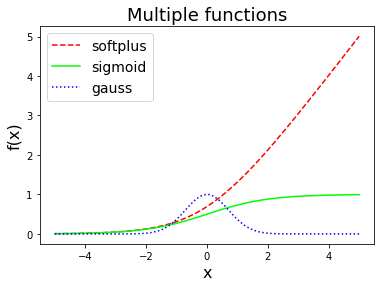

In [58]:
xs = np.linspace(-5, 5, 100)

plt.plot(xs, softplus(xs), color=(1, 0, 0), linestyle='--')
plt.plot(xs, sigmoid(xs), color=(0, 1, 0), linestyle='-')
plt.plot(xs, gauss(xs), color=(0, 0, 1), linestyle=':')
plt.legend(['softplus', 'sigmoid', 'gauss'], fontsize=14)
plt.title('Multiple functions', fontsize=18)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

# matplotlib loads image

In [67]:
img = plt.imread('./gallery3a.png')

print(img.shape)
print(img[:5,:5,0])

(1544, 3076, 4)
[[ 0.35686275  0.35686275  0.36078432  0.36470589  0.36470589]
 [ 0.36078432  0.35686275  0.36078432  0.36470589  0.36078432]
 [ 0.36078432  0.35686275  0.36470589  0.36862746  0.36862746]
 [ 0.36078432  0.35686275  0.36078432  0.36078432  0.36078432]
 [ 0.36078432  0.36862746  0.36078432  0.36470589  0.36470589]]


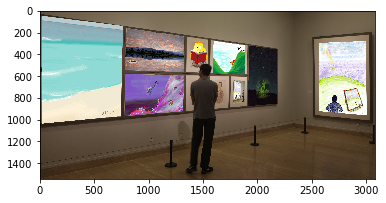

In [68]:
plt.imshow(img)

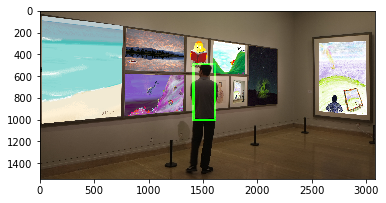

In [84]:
marked = img.copy()
marked[1000:1010, 1400:1620, 1] = 1
marked[480:500, 1400:1620, 1] = 1
marked[480:1000, 1400:1420, 1] = 1
marked[480:1000, 1600:1620, 1] = 1


plt.imshow(marked)



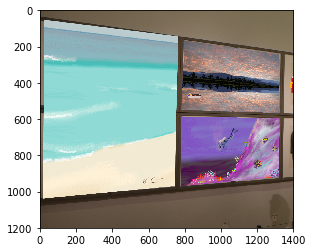

In [85]:
plt.imshow(marked[:1200, :1400, :])

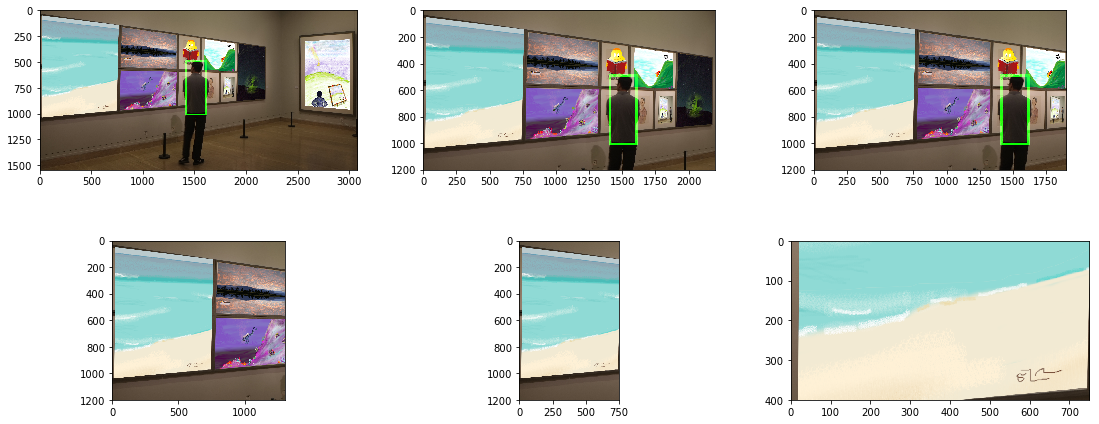

In [90]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.tight_layout(rect=[0.4, 0.5, 3, 2], h_pad=5)

plt.subplot(2,3,1)
plt.imshow(marked[:, :, :])

plt.subplot(2,3,2)
plt.imshow(marked[:1200, :2200, :])

plt.subplot(2,3,3)
plt.imshow(marked[:1200, :1900, :])

plt.subplot(2,3,4)
plt.imshow(marked[:1200, :1300, :])

plt.subplot(2,3,5)
plt.imshow(marked[:1200, :750, :])

plt.subplot(2,3,6)
plt.imshow(marked[600:1000, :750, :])


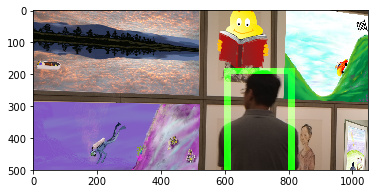

In [100]:
plt.imshow(marked[300:800, 800:1850, :])


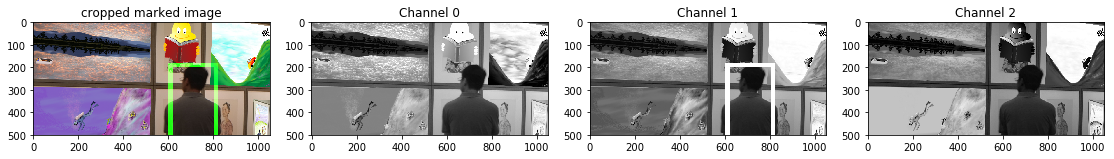

In [123]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.tight_layout(rect=[0.4, 0.5, 3, 2], h_pad=5)

cropped = marked[300:800, 800:1850, :]

plt.subplot(1,4,1)
plt.imshow(cropped)
plt.title('cropped marked image')

for i in range(3):
    plt.subplot(1,4,2 + i)
    plt.imshow(cropped[:, :, i], cmap='gray')
    plt.title('Channel %d'%i)
#     plt.colorbar()
    
# marked_r = cropped.copy()
# marked_g = cropped.copy()
# marked_b = cropped.copy()

# marked_r[:,:,1:-1] = 0
# marked_g[:,:,0] = 0
# marked_g[:,:,2:-1] = 0
# marked_b[:,:,0:2] = 0


# plt.subplot(2,4,5)
# plt.imshow(cropped)
# plt.title('cropped marked image')

# plt.subplot(2,4,6)
# plt.imshow(marked_r)
# plt.title('Channel 0')

# plt.subplot(2,4,7)
# plt.imshow(marked_g)

# plt.subplot(2,4,8)
# plt.imshow(marked_b)


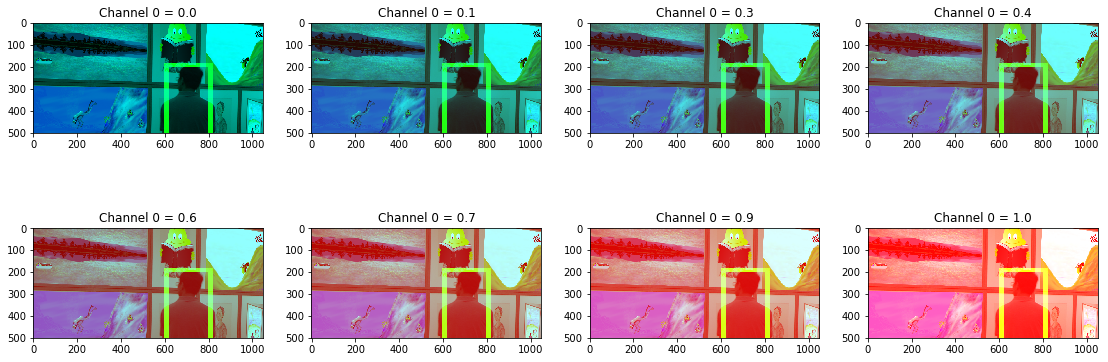

In [144]:
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.tight_layout(rect=[0.4, 0.5, 3, 2], h_pad=0)

marked_i = cropped.copy()
alphas = np.linspace(0, 1, 8)

for i, alpha in enumerate(alphas):
    marked_i[:,:,0] = alpha
    
    plt.subplot(2, 4, 1 + i)
    plt.imshow(marked_i)
    plt.title('Channel 0 = %.1f'%alpha)
    

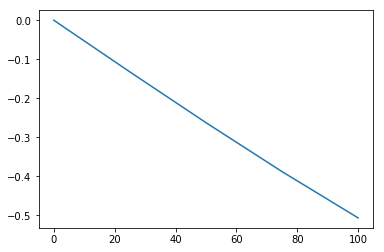

In [9]:
x = np.linspace(0, 100, 5)
plt.plot(x, np.sin(x))

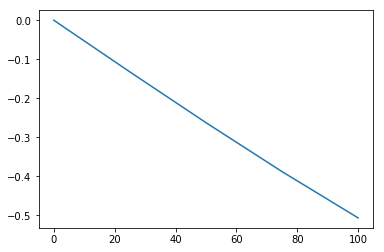